### K近邻
- knn输入为实例的特征向量，输出为实例的类别
- 对于新的实例，根据其k个最近邻的训练实例的类别，通过多数表决等方式进行预测
- k近邻模型的三个基本要素：距离度量、k值的选择和分类决策规则

#### 距离度量
- p = 1 曼哈顿距离
- p = 2 欧氏距离
- p = inf  闵式距离minkowski_distance 

#### k值的选择
- 选择较小的k值：优点-“学习”的近似误差会减小；缺点-“学习”的估计误差会增大，预测结果会对近邻的实例点非常敏感，k值的减小使模型变复杂，容易发生过拟合
- 选择较大的k值：优点-“学习”的估计误差会减小；缺点-“学习”的近似误差会增大，会对较远的（不相似）训练实例起预测作用，使预测发生错误，k值增加意味着整体模型变得简单
- 一般来说，在应用中k值取一个较小的数值，通常采用交叉验证法选取最优的k值

#### 分类决策规则
- 多采用多数表决发，即由输入实例的k个邻近训练实例中的多数类决定输入实例的类

#### k近邻法的实现
- 主要考虑的问题是如何对训练数据进行快速k近邻搜索，为了提高搜索销量，采用特殊的结构存储训练数据，减少计算距离的次数


#### k近邻法的步骤（多数表决法）
- 1）计算测试数据与各个训练数据之间的距离；

- 2）按照距离的递增关系进行排序；

- 3）选取距离最小的K个点；

- 4）确定前K个点所在类别的出现频率；

- 5）返回前K个点中出现频率最高的类别作为测试数据的预测分类

In [1]:
# 距离度量
import math
from itertools import combinations

def L(x, y, p=2):
    # x1 = [1, 1], x2 = [5,1]
    if len(x) == len(y) and len(x) >1:
        sum = 0
        for i in range(len(x)):
            sum += math.pow(abs(x[i] - y[i]), p)
        return math.pow(sum, 1/p)
    else:
        return  0

# data 
x1 = [1, 1]
x2 = [5, 1]
x3 = [4, 4]

# 计算测试实例点x1距离训练集实例点x2、x3的距离
for i in range(1, 5):
    r = {'1-{}'.format(c):L(x1, c, p=i) for c in [x2, x3]}
    # print(i,  min(zip(r.values(), r.keys())))
    print('i取值为{}，最小距离和对应实例点分别为{}'.format(i,  min(zip(r.values(), r.keys()))))

i取值为1，最小距离和对应实例点分别为(4.0, '1-[5, 1]')
i取值为2，最小距离和对应实例点分别为(4.0, '1-[5, 1]')
i取值为3，最小距离和对应实例点分别为(3.7797631496846193, '1-[4, 4]')
i取值为4，最小距离和对应实例点分别为(3.5676213450081633, '1-[4, 4]')


#### 用Python实现knn算法，遍历所有数据点，找出n个距离最近的点的分类情况，采用投票表决法，对测试数据进行分类预测

In [2]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

from collections import Counter

In [3]:
# data
iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['label'] = iris.target
df.columns = ['sepal length', 'sepal width', 'petal length', 'petal width', 'label']
df

,sepal length,sepal width,petal length,petal width,label
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
5,5.4,3.9,1.7,0.4,0
6,4.6,3.4,1.4,0.3,0
7,5.0,3.4,1.5,0.2,0
8,4.4,2.9,1.4,0.2,0
9,4.9,3.1,1.5,0.1,0


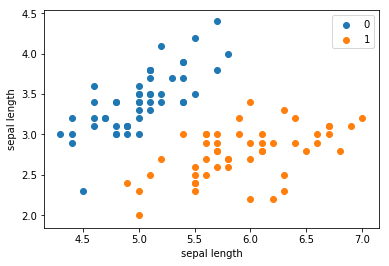

In [4]:
# 根据label绘图 'sepal length', 'sepal width', 'petal length', 'petal width', 'label
plt.scatter(df[:50]['sepal length'], df[:50]['sepal width'], label='0')
plt.scatter(df[50:100]['sepal length'], df[50:100]['sepal width'], label='1')
plt.xlabel('sepal length')
plt.ylabel('sepal length')
plt.legend()

In [5]:
# 设置训练集与测试集
data = np.array(df.iloc[:100, [0,1,-1]])
X, y = data[:, :2], data[:,-1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

In [6]:
# 实现KNN算法
class KNN:
    def __init__(self, X_train, y_train, n_neighbors=3, p=2):
        """
        parameter: n_neighbors 临近点个数
        parameter: p 距离度量
        """
        self.X_train = X_train
        self.y_train = y_train
        self.n = n_neighbors
        self.p = p
    
    
    def predict(self, X):
        knn_list = []
        for i in range(self.n):
            dist = np.linalg.norm(X - self.X_train[i], ord=self.p)
            knn_list.append((dist, self.y_train[i]))
        
        # 统计测试集中实例点所属的类别，多数表决法
        knn = [k[-1] for k in knn_list]
        count_pairs = Counter(knn)
        max_count = sorted(count_pairs, key=lambda x:x)[-1]
    
        return max_count
        
    
    def score(self, X_test, y_test):
        right_count = 0
        for X, y in zip(X_test, y_test):
            label = self.predict(X)
            if label == y:
                right_count += 1
            
        return right_count / len(X_test)

In [7]:
knn_list = []
test_point = [6.0, 3.0]

for i in range(3):
    dist = np.linalg.norm(test_point - X_train[i], ord=2)
    knn_list.append((dist, y_train[i]))

knn = [k[-1] for k in knn_list]
count_pairs = Counter(knn)
max_count = sorted(count_pairs, key=lambda x:x)[-1]

In [8]:
# 采用训练集对KNN类模型构建
clf = KNN(X_train, y_train)

In [15]:
# 对测试数据集进行预测,判断其精准度
clf.score(X_test,y_test)

0.4

In [10]:
test_point = [6.0, 3.0]
print('Test Point: {}'.format(clf.predict(test_point)))

Test Point: 1.0


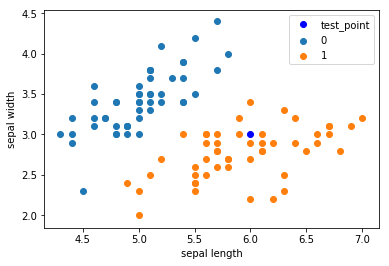

In [11]:
plt.scatter(df[:50]['sepal length'], df[:50]['sepal width'], label='0')
plt.scatter(df[50:100]['sepal length'], df[50:100]['sepal width'], label='1')
plt.plot(test_point[0], test_point[1], 'bo', label='test_point')
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.legend()

###  采用scikitlearn来实现KNN

In [17]:
from sklearn.neighbors import KNeighborsClassifier

In [18]:
clf_sk = KNeighborsClassifier()
clf_sk.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [19]:
clf_sk.score(X_test, y_test)

1.0

#### sklearn.neighbors.KNeighborsClassifier

- n_neighbors: 临近点个数
- p: 距离度量
- algorithm: 近邻算法，可选{'auto', 'ball_tree', 'kd_tree', 'brute'}
- weights: 确定近邻的权重

In [21]:
# kd-tree每个结点中主要包含的数据结构如下 
class KdNode(object):
    def __init__(self, dom_elt, split, left, right):
        self.dom_elt = dom_elt  # k维向量节点(k维空间中的一个样本点)
        self.split = split      # 整数（进行分割维度的序号）
        self.left = left        # 该结点分割超平面左子空间构成的kd-tree
        self.right = right      # 该结点分割超平面右子空间构成的kd-tree
 
 
class KdTree(object):
    def __init__(self, data):
        k = len(data[0])  # 数据维度
        
        def CreateNode(split, data_set): # 按第split维划分数据集exset创建KdNode
            if not data_set:    # 数据集为空
                return None
            # key参数的值为一个函数，此函数只有一个参数且返回一个值用来进行比较
            # operator模块提供的itemgetter函数用于获取对象的哪些维的数据，参数为需要获取的数据在对象中的序号
            #data_set.sort(key=itemgetter(split)) # 按要进行分割的那一维数据排序
            data_set.sort(key=lambda x: x[split])
            split_pos = len(data_set) // 2      # //为Python中的整数除法
            median = data_set[split_pos]        # 中位数分割点             
            split_next = (split + 1) % k        # cycle coordinates
            
            # 递归的创建kd树
            return KdNode(median, split, 
                          CreateNode(split_next, data_set[:split_pos]),     # 创建左子树
                          CreateNode(split_next, data_set[split_pos + 1:])) # 创建右子树
                                
        self.root = CreateNode(0, data)         # 从第0维分量开始构建kd树,返回根节点


# KDTree的前序遍历
def preorder(root):  
    print (root.dom_elt)  
    if root.left:      # 节点不为空
        preorder(root.left)  
    if root.right:  
        preorder(root.right)      

In [22]:
# 对构建好的kd树进行搜索，寻找与目标点最近的样本点：
from math import sqrt
from collections import namedtuple

# 定义一个namedtuple,分别存放最近坐标点、最近距离和访问过的节点数
result = namedtuple("Result_tuple", "nearest_point  nearest_dist  nodes_visited")
  
def find_nearest(tree, point):
    k = len(point) # 数据维度
    def travel(kd_node, target, max_dist):
        if kd_node is None:     
            return result([0] * k, float("inf"), 0) # python中用float("inf")和float("-inf")表示正负无穷
 
        nodes_visited = 1
        
        s = kd_node.split        # 进行分割的维度
        pivot = kd_node.dom_elt  # 进行分割的“轴”
        
        if target[s] <= pivot[s]:           # 如果目标点第s维小于分割轴的对应值(目标离左子树更近)
            nearer_node  = kd_node.left     # 下一个访问节点为左子树根节点
            further_node = kd_node.right    # 同时记录下右子树
        else:                               # 目标离右子树更近
            nearer_node  = kd_node.right    # 下一个访问节点为右子树根节点
            further_node = kd_node.left
 
        temp1 = travel(nearer_node, target, max_dist)  # 进行遍历找到包含目标点的区域
        
        nearest = temp1.nearest_point       # 以此叶结点作为“当前最近点”
        dist = temp1.nearest_dist           # 更新最近距离
        
        nodes_visited += temp1.nodes_visited  
 
        if dist < max_dist:     
            max_dist = dist    # 最近点将在以目标点为球心，max_dist为半径的超球体内
            
        temp_dist = abs(pivot[s] - target[s])    # 第s维上目标点与分割超平面的距离
        if  max_dist < temp_dist:                # 判断超球体是否与超平面相交
            return result(nearest, dist, nodes_visited) # 不相交则可以直接返回，不用继续判断
            
        #----------------------------------------------------------------------  
        # 计算目标点与分割点的欧氏距离  
        temp_dist = sqrt(sum((p1 - p2) ** 2 for p1, p2 in zip(pivot, target)))     
        
        if temp_dist < dist:         # 如果“更近”
            nearest = pivot          # 更新最近点
            dist = temp_dist         # 更新最近距离
            max_dist = dist          # 更新超球体半径
        
        # 检查另一个子结点对应的区域是否有更近的点
        temp2 = travel(further_node, target, max_dist) 
        
        nodes_visited += temp2.nodes_visited
        if temp2.nearest_dist < dist:        # 如果另一个子结点内存在更近距离
            nearest = temp2.nearest_point    # 更新最近点
            dist = temp2.nearest_dist        # 更新最近距离
 
        return result(nearest, dist, nodes_visited)
 
    return travel(tree.root, point, float("inf"))  # 从根节点开始递归

In [23]:
data = [[2,3],[5,4],[9,6],[4,7],[8,1],[7,2]]
kd = KdTree(data)
preorder(kd.root)

[7, 2]
[5, 4]
[2, 3]
[4, 7]
[9, 6]
[8, 1]


In [ ]:
from time import clock
from random import random

# 生成一个k维随机变量，每维分量值在0-1之间
def random_point(k):
    return [random() for _ in range(k)]

# 生成n个k维随机变量
def random_points(k, n):
    return [random_point(k) for _ in range(n)]